Track the measures of center of the amount of interactions for subdivisions of the day (use histogram).  On average, many times do unique pairs interact throughtout the subdivision?

In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
import time
import datetime

def toDatetimeTimestamp(t): #takes timestamp from original file and turns it into datetime datetime object
    return datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600)))
    #timezone conversion is done when adding 3600 seconds (one hour)

In [3]:
d = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(1385982020 + 3600)))
dd = datetime.datetime(2013, 12, 3, hour=15)
print(d, dd)
print(d > dd)

2013-12-02 12:00:20 2013-12-03 15:00:00
False


In [8]:
data = {} #key is end timestamp, value is tuple of statistics
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    
    hourly_data = {} #key is pair of students, value is count of timestamps

    t, id1, id2, cls1, cls2 = next(reader)
    ts = toDatetimeTimestamp(int(t))

    for day in [2, 3, 4, 5, 6]:
        for hour in [9, 10, 11, 12, 13, 14, 15, 16, 17]:
            end_timestamp = datetime.datetime(2013, 12, day, hour, 0, 0)
            
            while ts < end_timestamp:
                students = (min(int(id1), int(id2)), max(int(id1), int(id2)))
                if (students in hourly_data):
                    hourly_data[students] += 1
                else:
                    hourly_data[students] = 1
                
                try:
                    t, id1, id2, cls1, cls2 = next(reader)
                except: 
                    break
                ts = toDatetimeTimestamp(int(t))
                
            #process hourly_data
            num_interactions = sum(list(hourly_data.values()))
            data[end_timestamp] = (len(hourly_data), num_interactions)
            print("processing", end_timestamp, len(hourly_data), num_interactions)
            hourly_data.clear()


processing 2013-12-02 09:00:00 0 0
processing 2013-12-02 10:00:00 0 0
processing 2013-12-02 11:00:00 0 0
processing 2013-12-02 12:00:00 0 0
processing 2013-12-02 13:00:00 821 5732
processing 2013-12-02 14:00:00 592 4393
processing 2013-12-02 15:00:00 808 6770
processing 2013-12-02 16:00:00 495 5814
processing 2013-12-02 17:00:00 811 6071
processing 2013-12-03 09:00:00 290 6254
processing 2013-12-03 10:00:00 510 5507
processing 2013-12-03 11:00:00 1007 7402
processing 2013-12-03 12:00:00 198 5205
processing 2013-12-03 13:00:00 606 4833
processing 2013-12-03 14:00:00 606 4419
processing 2013-12-03 15:00:00 614 5294
processing 2013-12-03 16:00:00 268 3994
processing 2013-12-03 17:00:00 737 4430
processing 2013-12-04 09:00:00 257 5126
processing 2013-12-04 10:00:00 550 6315
processing 2013-12-04 11:00:00 1019 7586
processing 2013-12-04 12:00:00 203 4157
processing 2013-12-04 13:00:00 644 4079
processing 2013-12-04 14:00:00 475 4694
processing 2013-12-04 15:00:00 395 3307
processing 2013-12

Shown below are histograms of the average number of times a single pair interacts over a certain amount of time

<BarContainer object of 45 artists>

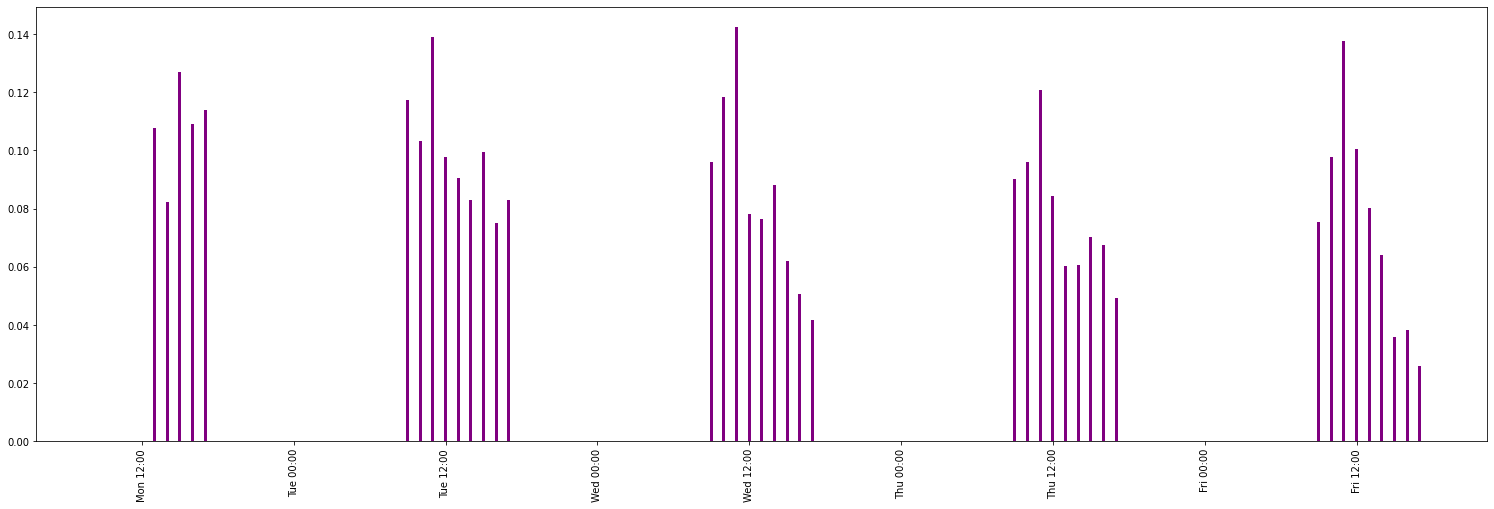

In [9]:
xaxis_vals = list(data.keys())
yaxis_vals = [float(counts)/(327.0*163) for (num_unique, counts) in list(data.values())]
#normaized averages, sum of interaction timestamps divided by total number of possible pairs

figure, axes = plt.subplots(figsize=(26,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(xaxis_vals, yaxis_vals, width=0.01, color="purple")

<BarContainer object of 45 artists>

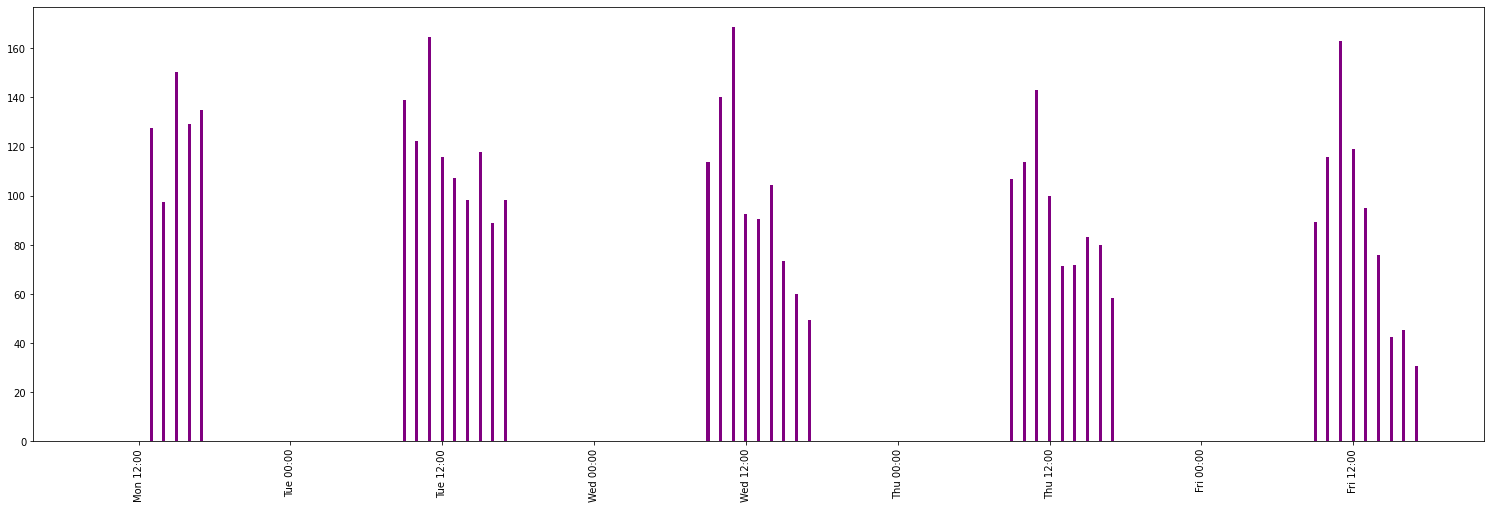

In [10]:
xaxis_vals1 = list(data.keys())
yaxis_vals1 = [float(counts)/(len(data)) for (num_unique, counts) in list(data.values())]
#normaized averages, sum of interaction timestamps divided by total number of possible pairs

figure, axes = plt.subplots(figsize=(26,8)) # set the size that you'd like (width, height)
axes.xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
plt.xticks(rotation=90)
plt.bar(xaxis_vals1, yaxis_vals1, width=0.01, color="purple")